### Importing Important Libraries

In [68]:
import math
import sympy  as sp
from sympy.matrices import Matrix
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi
import pprint
pp=pprint.PrettyPrinter(indent=5)

##### Declaring Variables


In [69]:
theta_i, alpha_i, d_i, a_i, A_i, a_3, d_1, d_3, d_5, d_7 = sp.symbols('theta_i alpha_i d_i a_i A_i a_3 d_1, d_3, d_5, d_7')
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7 = sp.symbols ('theta_1,theta_2, theta_3, theta_4, theta_5, theta_6, theta_7')

##### Rotation and Translation Matrices


In [70]:
Rot_z = sp.Matrix([ [sp.cos(theta_i), -sp.sin(theta_i),0,0], [sp.sin(theta_i),sp.cos(theta_i),0,0], [0,0,1,0], [0,0,0,1] ]);
Rot_x = sp.Matrix([ [1,0,0,0], [0,sp.cos(alpha_i), -sp.sin(alpha_i),0], [0, sp.sin(alpha_i), sp.cos(alpha_i), 0], [0,0,0,1] ]); 
Tran_z = sp.Matrix([[1,0,0,0], [0,1,0,0], [0,0,1,d_i], [0,0,0,1]]);
Tran_x = sp.Matrix([[1,0,0,a_i], [0,1,0,0], [0,0,1,0], [0,0,0,1]]);
print("\nRotation Matrix for rotation about Z")
pp.pprint(Rot_z)
print("\nRotation Matrix for rotation about X")
pp.pprint(Rot_x)
print("\nTranslation Matrix for translation about Z")
pp.pprint(Tran_z)
print("\nTranslation Matrix for translation about X")
pp.pprint(Tran_x)


Rotation Matrix for rotation about Z
Matrix([
[cos(theta_i), -sin(theta_i), 0, 0],
[sin(theta_i),  cos(theta_i), 0, 0],
[           0,             0, 1, 0],
[           0,             0, 0, 1]])

Rotation Matrix for rotation about X
Matrix([
[1,            0,             0, 0],
[0, cos(alpha_i), -sin(alpha_i), 0],
[0, sin(alpha_i),  cos(alpha_i), 0],
[0,            0,             0, 1]])

Translation Matrix for translation about Z
Matrix([
[1, 0, 0,   0],
[0, 1, 0,   0],
[0, 0, 1, d_i],
[0, 0, 0,   1]])

Translation Matrix for translation about X
Matrix([
[1, 0, 0, a_i],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])


##### General Homogeneous Matrix

In [71]:
A_i=Rot_z*Tran_z*Tran_x*Rot_x;
pp.pprint(A_i)

Matrix([
[cos(theta_i), -sin(theta_i)*cos(alpha_i),  sin(alpha_i)*sin(theta_i), a_i*cos(theta_i)],
[sin(theta_i),  cos(alpha_i)*cos(theta_i), -sin(alpha_i)*cos(theta_i), a_i*sin(theta_i)],
[           0,               sin(alpha_i),               cos(alpha_i),              d_i],
[           0,                          0,                          0,                1]])


### DH Parameter Table for Fixed $\theta_3$

| Link | $a_i$ | $\theta_i$ | $\alpha_i$ | $d_i$ |
| --- | --- | --- | --- | --- |
| 1 | 0 | $\theta_1^*$ | 90 | $d_1$ |
| 2 | 0 | $\theta_2^*$ | -90 | 0 |
| 3 | $a_3$ | 0 | -90 | $d_3$ |
| 4 | $-a_3$ | $\theta_4^*$ | 90 | 0 |
| 5 | 0 | $\theta_5^*$ | 90 | $d_5$ |
| 6 | $a_3$ | $\theta_6^*$ | -90 | 0 |
| 7 | 0 | $\theta_7^*$ | 0 | $-d_7$ |

##### Homogenous Matrix Ad0

In [72]:
Ad0=A_i.subs([(theta_i,math.radians(90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
Ad0

Matrix([
[6.12323399573677e-17, -6.12323399573677e-17,                   1.0, 0],
[                 1.0,  3.74939945665464e-33, -6.12323399573677e-17, 0],
[                   0,                   1.0,  6.12323399573677e-17, 0],
[                   0,                     0,                     0, 1]])

##### Homogenous Matrix A1

In [73]:
A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
A1

Matrix([
[cos(theta_1), -sin(theta_1), 0, 0],
[sin(theta_1),  cos(theta_1), 0, 0],
[           0,             0, 1, 0],
[           0,             0, 0, 1]])

##### Homogenous Matrix Ad1

In [74]:
Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,64.85)])
Ad1

Matrix([
[6.12323399573677e-17, 6.12323399573677e-17,                  -1.0,     0],
[                -1.0, 3.74939945665464e-33, -6.12323399573677e-17,     0],
[                   0,                  1.0,  6.12323399573677e-17, 64.85],
[                   0,                    0,                     0,     1]])

##### Homogenous Matrix A2

In [75]:
A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,-140)])
A2

Matrix([
[cos(theta_2), -sin(theta_2), 0,    0],
[sin(theta_2),  cos(theta_2), 0,    0],
[           0,             0, 1, -140],
[           0,             0, 0,    1]])

##### Homogenous Matrix Ad2

In [76]:
Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
Ad2

Matrix([
[1, 0, 0, 500],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

##### Homogenous Matrix A3

In [77]:
A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
A3

Matrix([
[cos(theta_3), -sin(theta_3), 0, 0],
[sin(theta_3),  cos(theta_3), 0, 0],
[           0,             0, 1, 0],
[           0,             0, 0, 1]])

##### Homogenous Matrix A4

In [78]:
A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])
A4

Matrix([
[1, 0, 0, 450],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

### Steps to Get the Jacobian Matrix usinh Method 2

##### Transformation Matrix  $T_e^0$ from $O_0$ to $O_e$

In [79]:
T1=Ad0*A1
T2=Ad0*A1*Ad1*A2
T3=Ad0*A1*Ad1*A2*Ad2*A3
T4=Ad0*A1*Ad1*A2*Ad2*A3*A4
T = T4.subs([(theta_1,math.radians(0)),(theta_2,math.radians(-45)),(theta_3,math.radians(45))])
print("Transformation Matrix with joint angle set to required position")
T


Transformation Matrix with joint angle set to required position


Matrix([
[                   0, 1.0,                     0, -288.703390593274],
[6.12323399573677e-17,   0,                  -1.0,             140.0],
[                -1.0,   0, -6.12323399573677e-17, -803.553390593274],
[                   0,   0,                     0,                 1]])

#### Calculating the Z vector for all links

In [80]:
print ("The Z0 matrix is given:")
Z0 = T1[:3,2]
pp.pprint(Z0)

The Z0 matrix is given:
Matrix([
[                  1.0],
[-6.12323399573677e-17],
[ 6.12323399573677e-17]])


In [81]:
print ("The Z1 matrix is given:")
Z1 = T2[:3,2]
pp.pprint(Z1)

The Z1 matrix is given:
Matrix([
[6.12323399573677e-17*sin(theta_1) - 6.12323399573677e-17*cos(theta_1) + 6.12323399573677e-17],
[                 6.12323399573677e-17*sin(theta_1) - 1.0*cos(theta_1) - 3.74939945665464e-33],
[                -1.0*sin(theta_1) - 6.12323399573677e-17*cos(theta_1) + 3.74939945665464e-33]])


In [82]:
print ("The Z2 matrix is given:")
Z2 = T3[:3,2]
pp.pprint(Z2)

The Z2 matrix is given:
Matrix([
[6.12323399573677e-17*sin(theta_1) - 6.12323399573677e-17*cos(theta_1) + 6.12323399573677e-17],
[                 6.12323399573677e-17*sin(theta_1) - 1.0*cos(theta_1) - 3.74939945665464e-33],
[                -1.0*sin(theta_1) - 6.12323399573677e-17*cos(theta_1) + 3.74939945665464e-33]])


In [83]:
print ("The Z4 matrix is given:")
Z3 = T4[:3,2]
pp.pprint(Z3)

The Z4 matrix is given:
Matrix([
[6.12323399573677e-17*sin(theta_1) - 6.12323399573677e-17*cos(theta_1) + 6.12323399573677e-17],
[                 6.12323399573677e-17*sin(theta_1) - 1.0*cos(theta_1) - 3.74939945665464e-33],
[                -1.0*sin(theta_1) - 6.12323399573677e-17*cos(theta_1) + 3.74939945665464e-33]])


#### Forming the columns $J_1$ to $J_6$ of the Jacobian Matrix

In [84]:
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1

diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2

diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4


print("The initial jacobian matrix for home position is given by:")
J = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

J1=J.subs([(theta_1,0),(theta_2,0),(theta_3,0)])
J1

The initial jacobian matrix for home position is given by:


Matrix([
[ 4.95981953654678e-14,                 950.0,                 450.0],
[                950.0,                     0,                     0],
[                140.0,  5.81707229594993e-14,  2.75545529808154e-14],
[                  1.0,                     0,                     0],
[-6.12323399573677e-17,                  -1.0,                  -1.0],
[ 6.12323399573677e-17, -6.12323399573677e-17, -6.12323399573677e-17]])

### Circle equations

#### The equation of ciecle is given by
$y^2+(z-72.5)^2=100$  
Using the polar form  
$y=r\cos(\theta),z=r\sin(\theta)$  
Therefore,  
$\dot{y}=r\cos(\theta)\dot{\theta}$  
$\dot{z}=r\sin(\theta)\dot{\theta}$

Also, $\dot{\theta}=\frac{2\pi}{5}$

In [85]:
T=T4
T_eval=T.subs([(theta_1,0),(theta_2,-0.7),(theta_3,1.5)])
# T_eval.simplify()
T_eval

Matrix([
[   0.717356090899523,     0.696706709347165,                     0,  65.5513972859398],
[4.26609820773246e-17, -4.39253920284479e-17,                  -1.0,             140.0],
[  -0.696706709347165,     0.717356090899523, -6.12323399573677e-17, -695.939112848469],
[                   0,                     0,                     0,                 1]])

#### Using the above equations and the Jacobian matrix we compute the tool positions over a time period using Numerical Integration

In [86]:
import numpy as np
import sympy as sp
x,y,z,r,o=sp.symbols("x y z r theta")
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
back_left_joint=[]

T=T4
x_tool=[]
y_tool=[]
z_tool=[]
#Tool Velocity Matrix
X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=200:
    if i<100:
        X_eval=X.subs(o,i)
    if i>=100:
        X_eval=X1.subs(o,j)
        j+=1
    back_left_joint.append((t_1[i],t_2[i],t_3[i]))
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    print(f"{t_1[i]},{t_2[i]},{t_3[i]}  {T_eval[3]},{T_eval[11]}")
    x_tool.append(T_eval[3])
    y_tool.append(T_eval[7])
    z_tool.append(T_eval[11])
    J_eval=J.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1




Computing Trajectory
0.0,-0.7,1.5  65.5513972859398,-695.939112848469
.2.63651055134617E-9,-0.704388528480752,1.50974151642953  65.5498637781909,-692.789367715781
.5.35502224256503E-9,-0.708605271463034,1.51942761882744  65.6465572711510,-689.641296779110
.8.15584629077804E-9,-0.712644586503961,1.52904979081417  65.8413778310900,-686.497997566676
.1.10392387003509E-8,-0.716500983081226,1.53859955836437  66.1341301051351,-683.362562338839
.1.40053886196557E-8,-0.720169132885286,1.54806849135848  66.5245235820032,-680.238075058953
.1.70544060611542E-8,-0.723643880511664,1.55744820542409  67.0121729417667,-677.127608374687
.2.01863089950203E-8,-0.726920254539753,1.56673036410332  67.5965984935108,-674.034220612552
.2.34010098159488E-8,-0.729993478978365,1.57590668138079  68.2772266996188,-670.960952788389
.2.66983012090857E-8,-0.732858985051743,1.58496892460392  69.0533907853278,-667.910825636557
.3.00778414263923E-8,-0.735512423292964,1.59390891782525  69.9243314320875,-664.886836660525


.1.64086188423382E-7,-0.423050630080126,1.51993429593490  259.983241024308,-661.287407053978
.1.59983204356190E-7,-0.418590117207141,1.51029851998277  260.950729247909,-664.267930701388
.1.55808181337095E-7,-0.414245216553625,1.50061026781835  261.823427079132,-667.277485131666
.1.51568018824814E-7,-0.410017852487189,1.49087813147750  262.600479059727,-670.313089070166
.1.47269455455453E-7,-0.405909877565949,1.48111073550343  263.281125375357,-673.371735791001
.1.42919058775667E-7,-0.401923080061050,1.47131673579804  263.864702526018,-676.450396126942
.1.38523216905405E-7,-0.398059191143107,1.46150481862128  264.350643899806,-679.546021498220
.1.34088132019904E-7,-0.394319891710000,1.45168369969361  264.738480249920,-682.655546956890
.1.29619815543659E-7,-0.390706818835594,1.44186212335512  265.027840074839,-685.775894243446
.1.25124084937590E-7,-0.387221571820756,1.43204886173389  265.218449901672,-688.903974852361
.1.20606561953321E-7,-0.383865717829569,1.42225271387481  265.31013447

.2.01988542580769E-8,-0.649708619159696,1.50951273555592  103.344427708336,-691.793706469953
.1.88018865368882E-8,-0.652745179523704,1.50985556648992  101.344591600813,-691.790801040740
.1.74026309384552E-8,-0.655774620545013,1.51018058090409  99.3447475817659,-691.787896574941
.1.60011411596250E-8,-0.658796896014047,1.51048777984360  97.3448956175846,-691.784993020599
.1.45974706796457E-8,-0.661811959559748,1.51077716428414  95.3450356759007,-691.782090325609
.1.31916727530100E-8,-0.664819764654805,1.51104873513345  93.3451677255923,-691.779188437719
.1.17838004031673E-8,-0.667820264620863,1.51130249323280  91.3452917367889,-691.776287304531
.1.03739064153677E-8,-0.670813412633723,1.51153843935827  89.3454076808765,-691.773386873507
.8.96204333004861E-9,-0.673799161728527,1.51175657422210  87.3455155305022,-691.770487091971
.7.54826343600384E-9,-0.676777464804929,1.51195689847379  85.3456152595788,-691.767587907113
.6.13261876344518E-9,-0.679748274632250,1.51213941270125  83.345706843

### Plotting trajectory in 2D Space

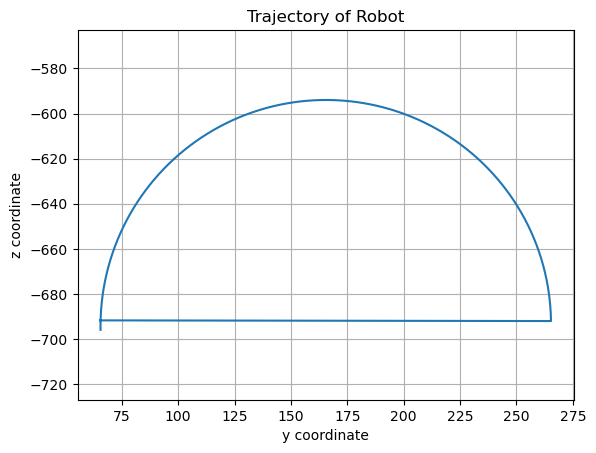

In [87]:
import matplotlib.pyplot as plt
plt.plot(x_tool,z_tool)
# plt.scatter(0,0.725)
plt.xlabel("y coordinate")
plt.ylabel("z coordinate")
plt.axis("equal")
plt.title("Trajectory of Robot")
plt.grid(True)
plt.show()

### Plotting Trajectory in 3D Space

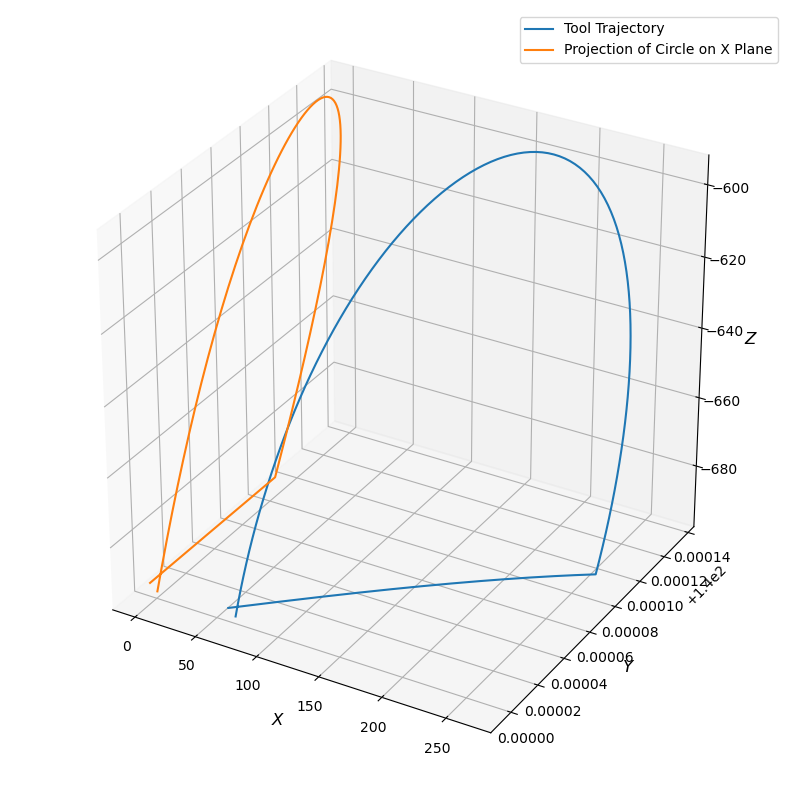

In [88]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
# ax.axes.set_xlim3d(left=0.65, right=0.7) 
# ax.axes.set_ylim3d(bottom=-0.15, top=0.15) 
# ax.axes.set_zlim3d(bottom=0.625, top=0.825) 
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)
ax.set_zlabel('$Z$', fontsize=12)
# ax.set_zticks(np.linspace(0.625,0.825,5).round(3))
# ax.set_xticks(np.linspace(0.65,0.7,20).round(2))
# ax.set_yticks(np.linspace(-0.15,0.15,5).round(2))
ax.plot(x_tool, y_tool, z_tool, label='Tool Trajectory')
ax.plot(np.full(len(y_tool),0.65), y_tool, z_tool, label='Projection of Circle on X Plane')
ax.legend()

plt.show()


In [89]:
back_left_joint

[(0.0, -0.7, 1.5),
 (2.63651055134617e-9, -0.704388528480752, 1.50974151642953),
 (5.35502224256503e-9, -0.708605271463034, 1.51942761882744),
 (8.15584629077804e-9, -0.712644586503961, 1.52904979081417),
 (1.10392387003509e-8, -0.716500983081226, 1.53859955836437),
 (1.40053886196557e-8, -0.720169132885286, 1.54806849135848),
 (1.70544060611542e-8, -0.723643880511664, 1.55744820542409),
 (2.01863089950203e-8, -0.726920254539753, 1.56673036410332),
 (2.34010098159488e-8, -0.729993478978365, 1.57590668138079),
 (2.66983012090857e-8, -0.732858985051743, 1.58496892460392),
 (3.00778414263923e-8, -0.735512423292964, 1.59390891782525),
 (3.35391390179387e-8, -0.737949675904533, 1.60271854559365),
 (3.70815370533415e-8, -0.740166869338657, 1.61138975721819),
 (4.07041968936640e-8, -0.742160387042182, 1.61991457152574),
 (4.44060815758979e-8, -0.743926882303588, 1.62828508212954),
 (4.81859388979061e-8, -0.745463291131795, 1.63649346322250),
 (5.20422843004883e-8, -0.746766845089030, 1.644531

In [90]:
# l=back_left_joint[1::]
for i in back_left_joint:
    T=T4
    T_eval=T.subs([(theta_1,i[0]),(theta_2,i[1]),(theta_3,i[2])])
    x_tool.append(T_eval[3])
    y_tool.append(T_eval[7])
    z_tool.append(T_eval[11])
    print(f"{i} {T_eval[3]} {T_eval[11]}")

(0.0, -0.7, 1.5) 65.5513972859398 -695.939112848469
(2.63651055134617e-9, -0.704388528480752, 1.50974151642953) 65.5498637781909 -692.789367715781
(5.35502224256503e-9, -0.708605271463034, 1.51942761882744) 65.6465572711510 -689.641296779110
(8.15584629077804e-9, -0.712644586503961, 1.52904979081417) 65.8413778310900 -686.497997566676
(1.10392387003509e-8, -0.716500983081226, 1.53859955836437) 66.1341301051351 -683.362562338839
(1.40053886196557e-8, -0.720169132885286, 1.54806849135848) 66.5245235820032 -680.238075058953
(1.70544060611542e-8, -0.723643880511664, 1.55744820542409) 67.0121729417667 -677.127608374687
(2.01863089950203e-8, -0.726920254539753, 1.56673036410332) 67.5965984935108 -674.034220612552
(2.34010098159488e-8, -0.729993478978365, 1.57590668138079) 68.2772266996188 -670.960952788389
(2.66983012090857e-8, -0.732858985051743, 1.58496892460392) 69.0533907853278 -667.910825636557
(3.00778414263923e-8, -0.735512423292964, 1.59390891782525) 69.9243314320875 -664.88683666052

(1.25124084937590e-7, -0.387221571820756, 1.43204886173389) 265.218449901672 -688.903974852361
(1.20606561953321e-7, -0.383865717829569, 1.42225271387481) 265.310134472767 -692.036693103301
(1.19581535489493e-7, -0.387350440293529, 1.42405443282666) 263.310727177934 -692.033552218562
(1.18549676898138e-7, -0.390830769811309, 1.42583770352973) 261.311318152451 -692.030416005766
(1.17511040477995e-7, -0.394306690515898, 1.42760254633112) 259.311907286346 -692.027284421174
(1.16465680603540e-7, -0.397778185960667, 1.42934898105678) 257.312494470341 -692.024157421205
(1.15413651727959e-7, -0.401245239124709, 1.43107702702220) 255.313079595849 -692.021034962425
(1.14355008384073e-7, -0.404707832418157, 1.43278670304294) 253.313662554982 -692.017917001531
(1.13289805187103e-7, -0.408165947687456, 1.43447802744498) 251.314243240549 -692.014803495342
(1.12218096835537e-7, -0.411619566220621, 1.43615101807480) 249.314821546063 -692.011694400788
(1.11139938112809e-7, -0.415068668752457, 1.437805

(3.29594187049812e-9, -0.685667224996061, 1.51245101313307) 79.3458654817207 -691.758893402564
(1.87501235723204e-9, -0.688615270465662, 1.51258010021384) 77.3459324931949 -691.755996073751
(4.52423465927343e-10, -0.691555632562579, 1.51269137902484) 75.3459912728183 -691.753099075671
(-9.71774167162976e-10, -0.694488263481135, 1.51278484985935) 73.3460418021839 -691.750202354781
(-2.39753020480887e-9, -0.697413115315842, 1.51286051295380) 71.3460840641778 -691.747305857430
(-3.82479461541689e-9, -0.700330140066414, 1.51291836848829) 69.3461180429818 -691.744409529861
(-5.25351767986064e-9, -0.703239289642750, 1.51295841658698) 67.3461437240762 -691.741513318214
(-6.68364999809445e-9, -0.706140515869895, 1.51298065731841) 65.3461610942429 -691.738617168534


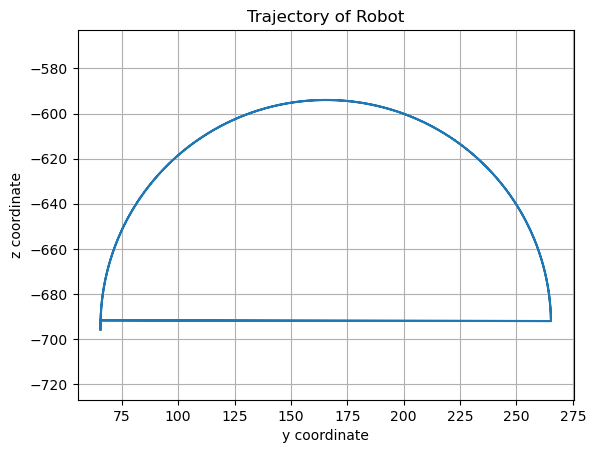

In [91]:
import matplotlib.pyplot as plt
plt.plot(x_tool,z_tool)
# plt.scatter(0,0.725)
plt.xlabel("y coordinate")
plt.ylabel("z coordinate")
plt.axis("equal")
plt.title("Trajectory of Robot")
plt.grid(True)
plt.show()